## <center> Индивидуальный проект по анализу данных </center>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Описание данных

Данные связаны с прямыми маркетинговыми кампаниями португальского банковского учреждения. Маркетинговые кампании основывались на телефонных звонках. Часто требовалось более одного контакта с одним и тем же клиентом, чтобы получить доступ к тому, будет ли продукт (банковский срочный депозит) подписан ("yes") или нет ("no").

## Входные переменные:
### Данные клиента банка:
* 1 - age (числовой)
* 2 - job: тип работы (категориальный)
* 3 - marital: (категориальный: 'divorced','married','single','unknown')
* 4 - education (категориальное: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
* 5 - default: имеет ли кредит по умолчанию? (категориальный: 'no','yes','unknown')
* 6 - housing: есть ли жилищный кредит? (категориальный: 'no','yes','unknown')
* 7 - loan: есть ли личный кредит? (категориальный: 'no','yes','unknown')
### Данные связанные с последним контактом текущей кампании:
* 8 - contact: тип контактной связи (категориальный: 'cellular','telephone')
* 9 - month: последний месяц контакта в году (категориальный: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: последний контактный день недели (категориальный:  'mon','tue','wed','thu','fri')
* 11 - duration: продолжительность последнего контакта в секундах (числовой). Важное примечание: этот атрибут сильно влияет на выходную цель (например, если длительность=0, то y= "no"). Тем не менее, продолжительность не известна до выполнения вызова. Кроме того, после окончания вызова y, очевидно, известен. Таким образом, эти входные данные должны включаться только для целей сравнения и должны быть отброшены, если намерение состоит в том, чтобы иметь реалистичную прогностическую модель.
### Другие атрибуты:
* 12 - campaign: количество контактов, выполненных в ходе этой кампании и для данного клиента (числовой - включает последний контакт)
* 13 - pdays: количество дней, прошедших после того, как с клиентом в последний раз связывались из предыдущей кампании (числовое значение; 999 означает, что с клиентом ранее не связывались)
* 14 - previous: количество контактов, выполненных до этой кампании и для этого клиента (числовой)
* 15 - poutcome: результат предыдущей маркетинговой кампании (категорично:  'failure','nonexistent','success')
### Атрибуты социального и экономического контекста
* 16 - emp.var.rate: коэффициент вариации занятости - квартальный показатель (числовой)
* 17 - cons.price.idx: индекс потребительских цен - месячный показатель (числовой)
* 18 - cons.conf.idx: индекс потребительского доверия - месячный показатель (числовой)
* 19 - euribor3m: курс euribor 3 месяца - дневной индикатор (числовой)
* 20 - nr.employed: численность работников - квартальный показатель (числовой)

### Целевой признак:
* 21 - y - подписался ли клиент на срочный депозит? (двоичный: 'yes','no')

In [2]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


###  Часть 1. Подготовка данных

In [3]:
holdout = pd.read_csv('bank-additional-full_holdout.csv')

In [4]:
df = pd.read_csv("bank-additional-full_2.csv")
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,28,admin.,single,high.school,no,yes,no,cellular,may,thu,...,1,6,1,success,-1.8,93.876,-40.0,0.683,5008.7,yes
1,42,technician,divorced,university.degree,no,no,no,cellular,jul,fri,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
2,48,services,married,high.school,unknown,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
3,33,admin.,married,high.school,no,no,yes,telephone,may,fri,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
4,59,retired,married,professional.course,no,yes,no,telephone,jun,wed,...,9,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000
mean,40.005615,258.074469,2.547534,961.181525,0.176973,0.076229,93.574145,-40.507921,3.613865,5166.700212
std,10.406028,258.757559,2.722900,190.059312,0.504896,1.572781,0.580180,4.653157,1.737088,72.416852
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26360 entries, 0 to 26359
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             26360 non-null  int64  
 1   job             26360 non-null  object 
 2   marital         26360 non-null  object 
 3   education       26360 non-null  object 
 4   default         26360 non-null  object 
 5   housing         26360 non-null  object 
 6   loan            26360 non-null  object 
 7   contact         26360 non-null  object 
 8   month           26360 non-null  object 
 9   day_of_week     26360 non-null  object 
 10  duration        26360 non-null  int64  
 11  campaign        26360 non-null  int64  
 12  pdays           26360 non-null  int64  
 13  previous        26360 non-null  int64  
 14  poutcome        26360 non-null  object 
 15  emp.var.rate    26360 non-null  float64
 16  cons.price.idx  26360 non-null  float64
 17  cons.conf.idx   26360 non-null 

In [6]:
df.shape

(26360, 21)

In [7]:
for col in df.columns:
    print("{0}, num. NA's: {1}".format(col, pd.isnull(df[col]).sum()))

age, num. NA's: 0
job, num. NA's: 0
marital, num. NA's: 0
education, num. NA's: 0
default, num. NA's: 0
housing, num. NA's: 0
loan, num. NA's: 0
contact, num. NA's: 0
month, num. NA's: 0
day_of_week, num. NA's: 0
duration, num. NA's: 0
campaign, num. NA's: 0
pdays, num. NA's: 0
previous, num. NA's: 0
poutcome, num. NA's: 0
emp.var.rate, num. NA's: 0
cons.price.idx, num. NA's: 0
cons.conf.idx, num. NA's: 0
euribor3m, num. NA's: 0
nr.employed, num. NA's: 0
y, num. NA's: 0


In [8]:
print(df.isna().sum())
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Пропущенных значений не обнаружено

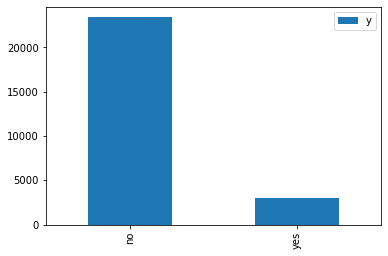

In [9]:
df['y'].value_counts().plot(kind='bar')
plt.legend()

На основе этого графика можно сделать вывод, что датасет несбалансирован.

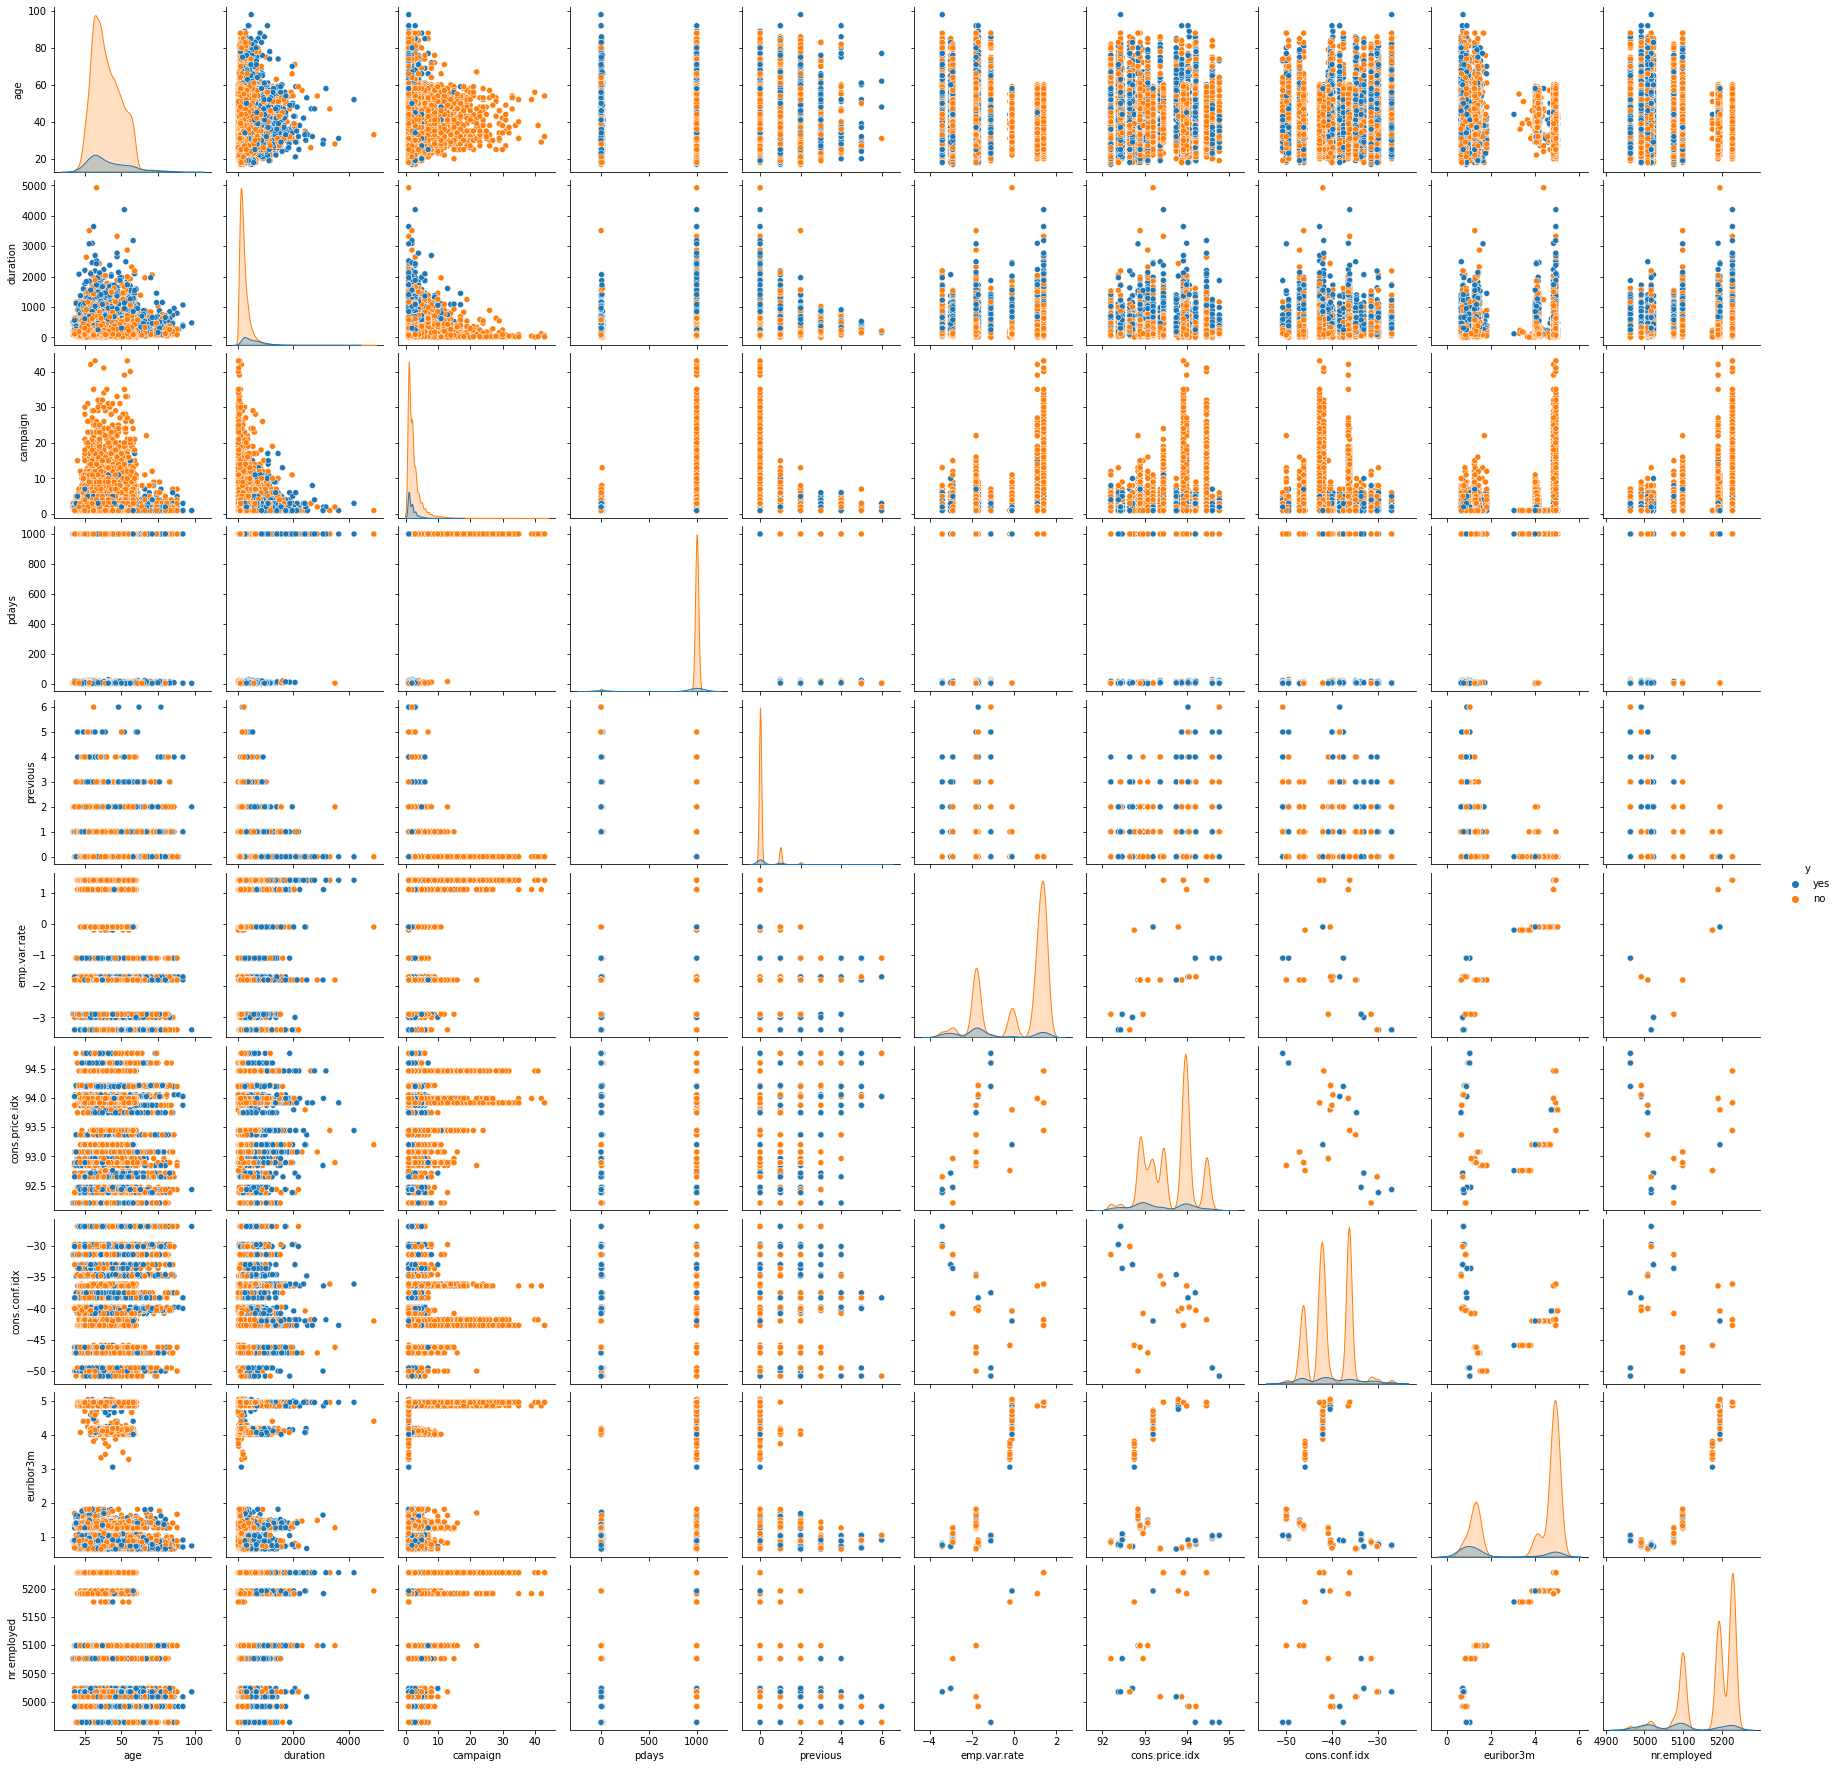

In [9]:
sns.pairplot(df, hue='y')

В датасете есть численные и категориальные признаки

In [10]:
print("Численные признаки:","\n")
continous_vars=df.describe().columns
print(continous_vars)

Численные признаки: 

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [11]:
print("Категориальные признаки","\n")
categorical_vars=df.describe(include=[object]).columns
print(categorical_vars)

Категориальные признаки 

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


Визуализация численных признаков 



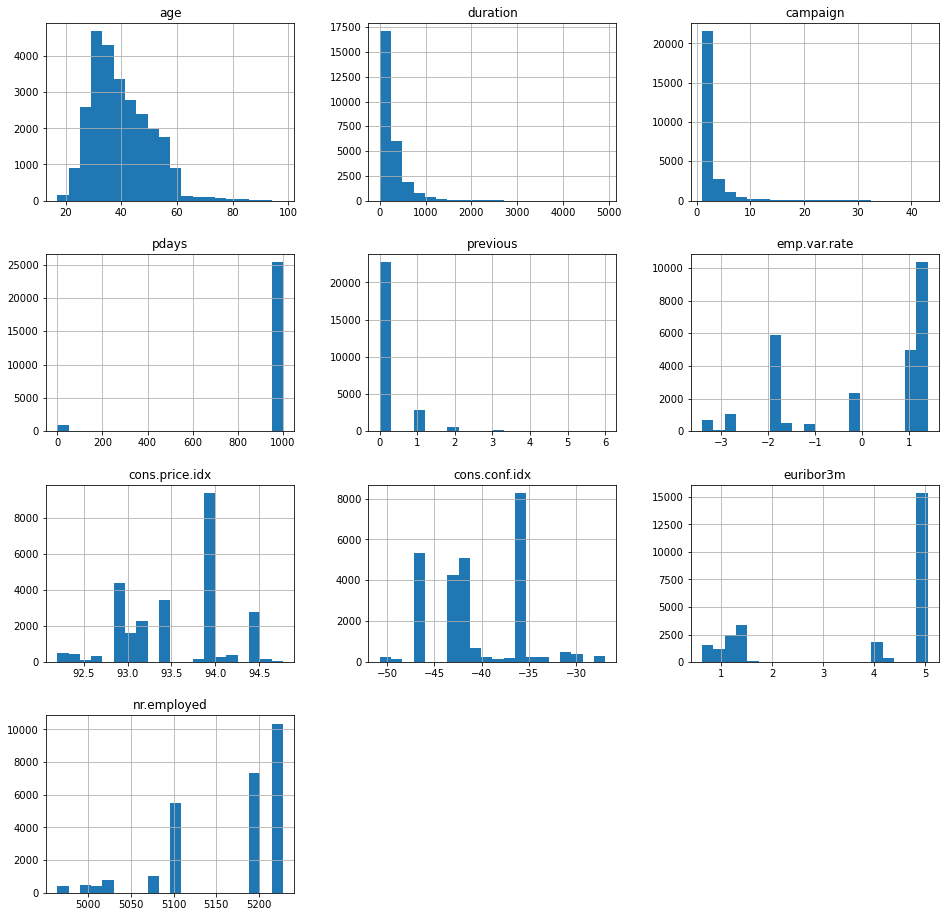

In [12]:
print("Визуализация численных признаков","\n")
df.hist(column=continous_vars,figsize=(16,16), bins=20)
plt.show()

Стоит учесть числа 999 в признаке pdays. Далее будет произведено преобразование этого числового признака в категориальный

Визуализация категориальных признаков 



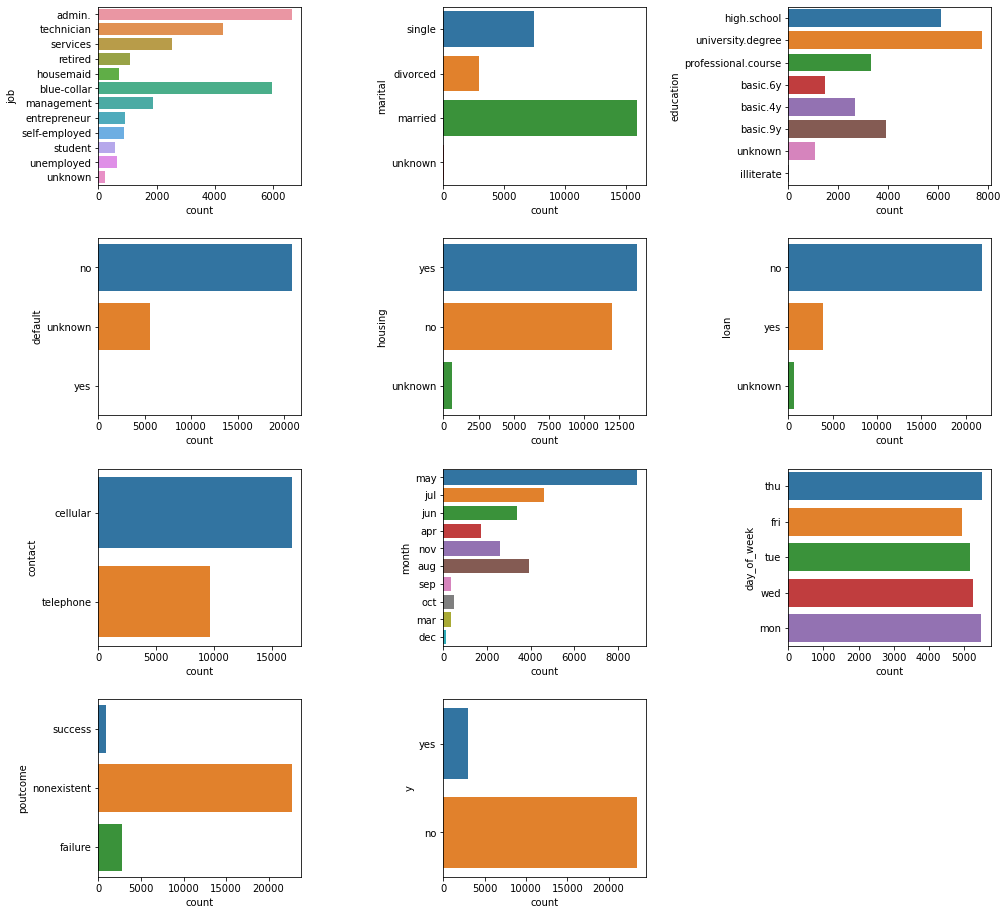

In [13]:
print("Визуализация категориальных признаков","\n")
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)
for i, ax in enumerate(axes.ravel()):
    if i > 10:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=df, ax=ax)
plt.show()

Похожие значения признака education basic.4y, basic.6y, basic.9y можно объединить в одно

In [14]:
pd.crosstab(df['default'], df.y)

y,no,yes
default,,
no,18159,2677
unknown,5230,293
yes,1,0


В рамках признака default есть только 1 клиент, о котором мы точно знаем, что у него есть кредит по умолчанию. Эта переменная не дает никакой информации, и она будет удалена далее.

Correlation Matrix 



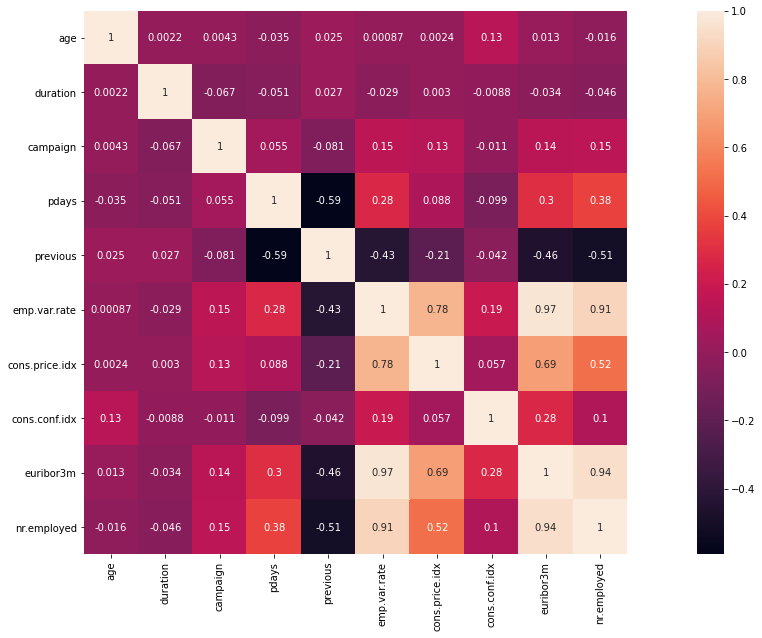

In [15]:
# корреляционная матрица
print("Correlation Matrix","\n")    
correlation=df.corr(method="pearson")
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
plt.show()

Высокий коэффицинт корреляции (>0.9) наблюдается у признаков emp.var.rate, euribor3m, nr.employed. Нужно удалить некоторые их них.
Также необходимо изменить значения признака pdays(999). Признак duration сильно влияет на выходную цель, поэтому его также стоит отбросить. Продолжительность звонка не известна до выполнения вызова (упомянуто в описании признаков в начале).

Разделим датасет на train/test


In [5]:
X = df[[x for x in df if x != 'y']]
y = df['y']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17, stratify = y)

Вычислим z-score

In [7]:
from scipy.stats import zscore
features = list(set(X_train.columns) - set(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'pdays_cat' ]))
zs = pd.DataFrame((np.abs(zscore(X_train[features])) < 3), columns=X_train[features].columns)
for col in zs.columns:
    print(zs[col].value_counts())

True     17756
False      696
Name: pdays, dtype: int64
True    18452
Name: cons.conf.idx, dtype: int64
True     18068
False      384
Name: campaign, dtype: int64
True    18452
Name: nr.employed, dtype: int64
True     18068
False      384
Name: duration, dtype: int64
True    18452
Name: euribor3m, dtype: int64
True    18452
Name: cons.price.idx, dtype: int64
True    18452
Name: emp.var.rate, dtype: int64
True     17940
False      512
Name: previous, dtype: int64
True     18296
False      156
Name: age, dtype: int64


In [8]:
X_train['zscore'] = zscore(X_train[('cons.price.idx')])

In [9]:
X_train_no_outl = X_train[(X_train['zscore']<3) & (X_train['zscore']>-3)]
X_train_outl = X_train[(X_train['zscore']>3)]
print(X_train_outl.shape)
X_train_no_outl.head(20)

(0, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,zscore
5112,52,admin.,divorced,university.degree,unknown,yes,yes,cellular,jul,tue,...,9,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0.592164
17939,20,student,single,high.school,no,yes,no,cellular,aug,tue,...,1,999,1,failure,-2.9,92.201,-31.4,0.859,5076.2,-2.365306
7718,32,services,married,basic.9y,unknown,yes,no,cellular,nov,thu,...,4,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,-0.644565
2110,49,management,divorced,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.723071
22637,31,services,single,high.school,no,yes,no,telephone,jun,tue,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,1.534352
3161,31,admin.,married,university.degree,no,yes,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0.592164
8308,39,technician,single,university.degree,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.259,5099.1,-1.173361
15473,41,admin.,married,university.degree,no,no,no,cellular,aug,thu,...,13,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,-0.224283
9462,42,management,divorced,university.degree,unknown,yes,no,cellular,jul,mon,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0.592164
13244,31,blue-collar,single,basic.9y,unknown,no,no,telephone,may,fri,...,7,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,0.723071


Не стоит незамедлитено удалять наблюдения, чьи значения z-score находятся не в норме. В случае признака previous (количество контактов, выполненных до этой кампании для каждого клиента) повышенное значение z-score означает то, что с большинством клиентов ранее не устанавливался контакт. Выбросом это не назвать, соответственно, в удалении подобных признаков нет необходимости.

In [10]:
X_train.drop(columns = 'zscore')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
5112,52,admin.,divorced,university.degree,unknown,yes,yes,cellular,jul,tue,201,9,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
17939,20,student,single,high.school,no,yes,no,cellular,aug,tue,532,1,999,1,failure,-2.9,92.201,-31.4,0.859,5076.2
7718,32,services,married,basic.9y,unknown,yes,no,cellular,nov,thu,251,4,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8
2110,49,management,divorced,high.school,unknown,no,no,telephone,may,mon,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
22637,31,services,single,high.school,no,yes,no,telephone,jun,tue,953,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13567,58,retired,married,basic.9y,no,no,yes,cellular,may,fri,235,2,999,0,nonexistent,-1.8,92.893,-46.2,1.259,5099.1
12071,26,admin.,single,university.degree,no,yes,no,cellular,may,mon,76,2,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
3297,45,housemaid,married,professional.course,unknown,no,no,telephone,jun,thu,210,3,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1
1697,46,admin.,married,university.degree,no,no,no,cellular,aug,mon,67,5,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1


Обернем преобразования в pipeline

In [11]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction import DictVectorizer

def edit_pdays(df):
    df["pdays_cat"]=[0 if each==999  else 1 for each in df.pdays]
    df=df.drop(["pdays"],axis=1)
    return df[['pdays_cat']]

def get_categ_col(df):
    df.replace(to_replace = ['basic.6y','basic.4y', 'basic.9y'], value = 'basic', inplace=True)
    df=df.drop(['default'],axis=1)
    return df[['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'pdays_cat']]

def get_num_cols(df):
    df = df.drop(['euribor3m', 'nr.employed', 'duration'], axis=1)
    return df[['age', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx']]

vec = make_union(*[
    make_pipeline(FunctionTransformer(edit_pdays, validate=False)),
    make_pipeline(FunctionTransformer(get_categ_col, validate=False), OneHotEncoder(sparse=False)),
    make_pipeline(FunctionTransformer(get_num_cols, validate=False), MinMaxScaler()),
])
 
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

In [25]:
X_train.shape

(18452, 56)

In [26]:
y_train

5112      no
17939    yes
7718      no
2110      no
22637     no
        ... 
13567     no
12071     no
3297      no
1697      no
20635     no
Name: y, Length: 18452, dtype: object

Закодируем значения целевой переменной: 1 - yes, 0 - no

In [12]:
from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder().fit(y_train)

y_train_edited = target_encoder.transform(y_train)

In [13]:
target_y_encoder = LabelEncoder().fit(y_test)

y_test_edited = target_encoder.transform(y_test)

In [14]:
y_train_edited

array([0, 1, 0, ..., 0, 0, 0])

In [15]:
y_test_edited

array([0, 0, 0, ..., 0, 0, 0])

###  Часть 2. Обучение модели классификации

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
import pickle

#### KNN

In [17]:
knn_params = {
    'n_neighbors': range(1, 15),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(1, 50),
    'metric': ['euclidean','manhattan','minkowski']
}

knn = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=knn_params,
    scoring='roc_auc', 
    cv=5, n_jobs=-1, verbose=True, n_iter = 100
).fit(X_train, y_train_edited)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 13.0min finished


In [18]:
s = pickle.dumps(knn)
knn_saved = pickle.loads(s)

print(knn.best_score_)
print(knn.best_estimator_)

0.7204858403511936
KNeighborsClassifier(algorithm='kd_tree', leaf_size=36, metric='manhattan',
                     n_neighbors=13)


#### Логистическая регрессия

In [19]:
lr_params = {
    'C': np.linspace(1e-4, 1000, 200),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'class_weight': ['balanced'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'tol': np.linspace(1e-6, 1, 1000)
}

lr = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=lr_params,
    scoring='roc_auc',
    cv=5, n_jobs=-1, verbose=True, n_iter = 100
).fit(X_train, y_train_edited)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   10.1s finished


In [20]:
s = pickle.dumps(lr)
lr_saved = pickle.loads(s)

print(lr.best_score_)
print(lr.best_estimator_)

0.7685002457596032
LogisticRegression(C=130.65335326633166, class_weight='balanced',
                   tol=0.32132199999999994)


#### Random Forest

In [21]:
rfc = RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 5, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, y_train_edited)
rs.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 16.0min finished


{'n_estimators': 800,
 'min_samples_split': 28,
 'min_samples_leaf': 12,
 'max_features': 'sqrt',
 'max_depth': 14,
 'bootstrap': True}

При текущих значениях гиперпараметров имеет смысл попробовать улучшить модель, так как если обратиться к параметру best_params_, это может не дать наилучших данных о диапазонах параметров. 

In [22]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,800,28,12,sqrt,14,True,0.896748,0.898645,0.898656,1
1,300,28,7,log2,13,True,0.897019,0.899729,0.898493,2
2,700,18,7,sqrt,7,False,0.896206,0.898916,0.898331,3
3,200,12,50,log2,4,True,0.895664,0.900271,0.898331,4
4,400,23,12,sqrt,11,True,0.896206,0.898645,0.898277,5
5,600,50,23,sqrt,14,False,0.896477,0.898916,0.898277,5
6,700,23,7,log2,15,False,0.894851,0.898374,0.898277,7
7,900,34,18,sqrt,11,True,0.895935,0.898916,0.898222,8
8,300,2,23,log2,14,False,0.895935,0.898103,0.898222,9
9,300,18,18,sqrt,13,True,0.895664,0.898645,0.898222,10


 Создадим столбчатые графики, на которых, по оси Х, расположены значения гиперпараметров, а по оси Y — средние значения, показываемые моделями. Это позволит понять то, какие значения гиперпараметров, в среднем, лучше всего себя показывают

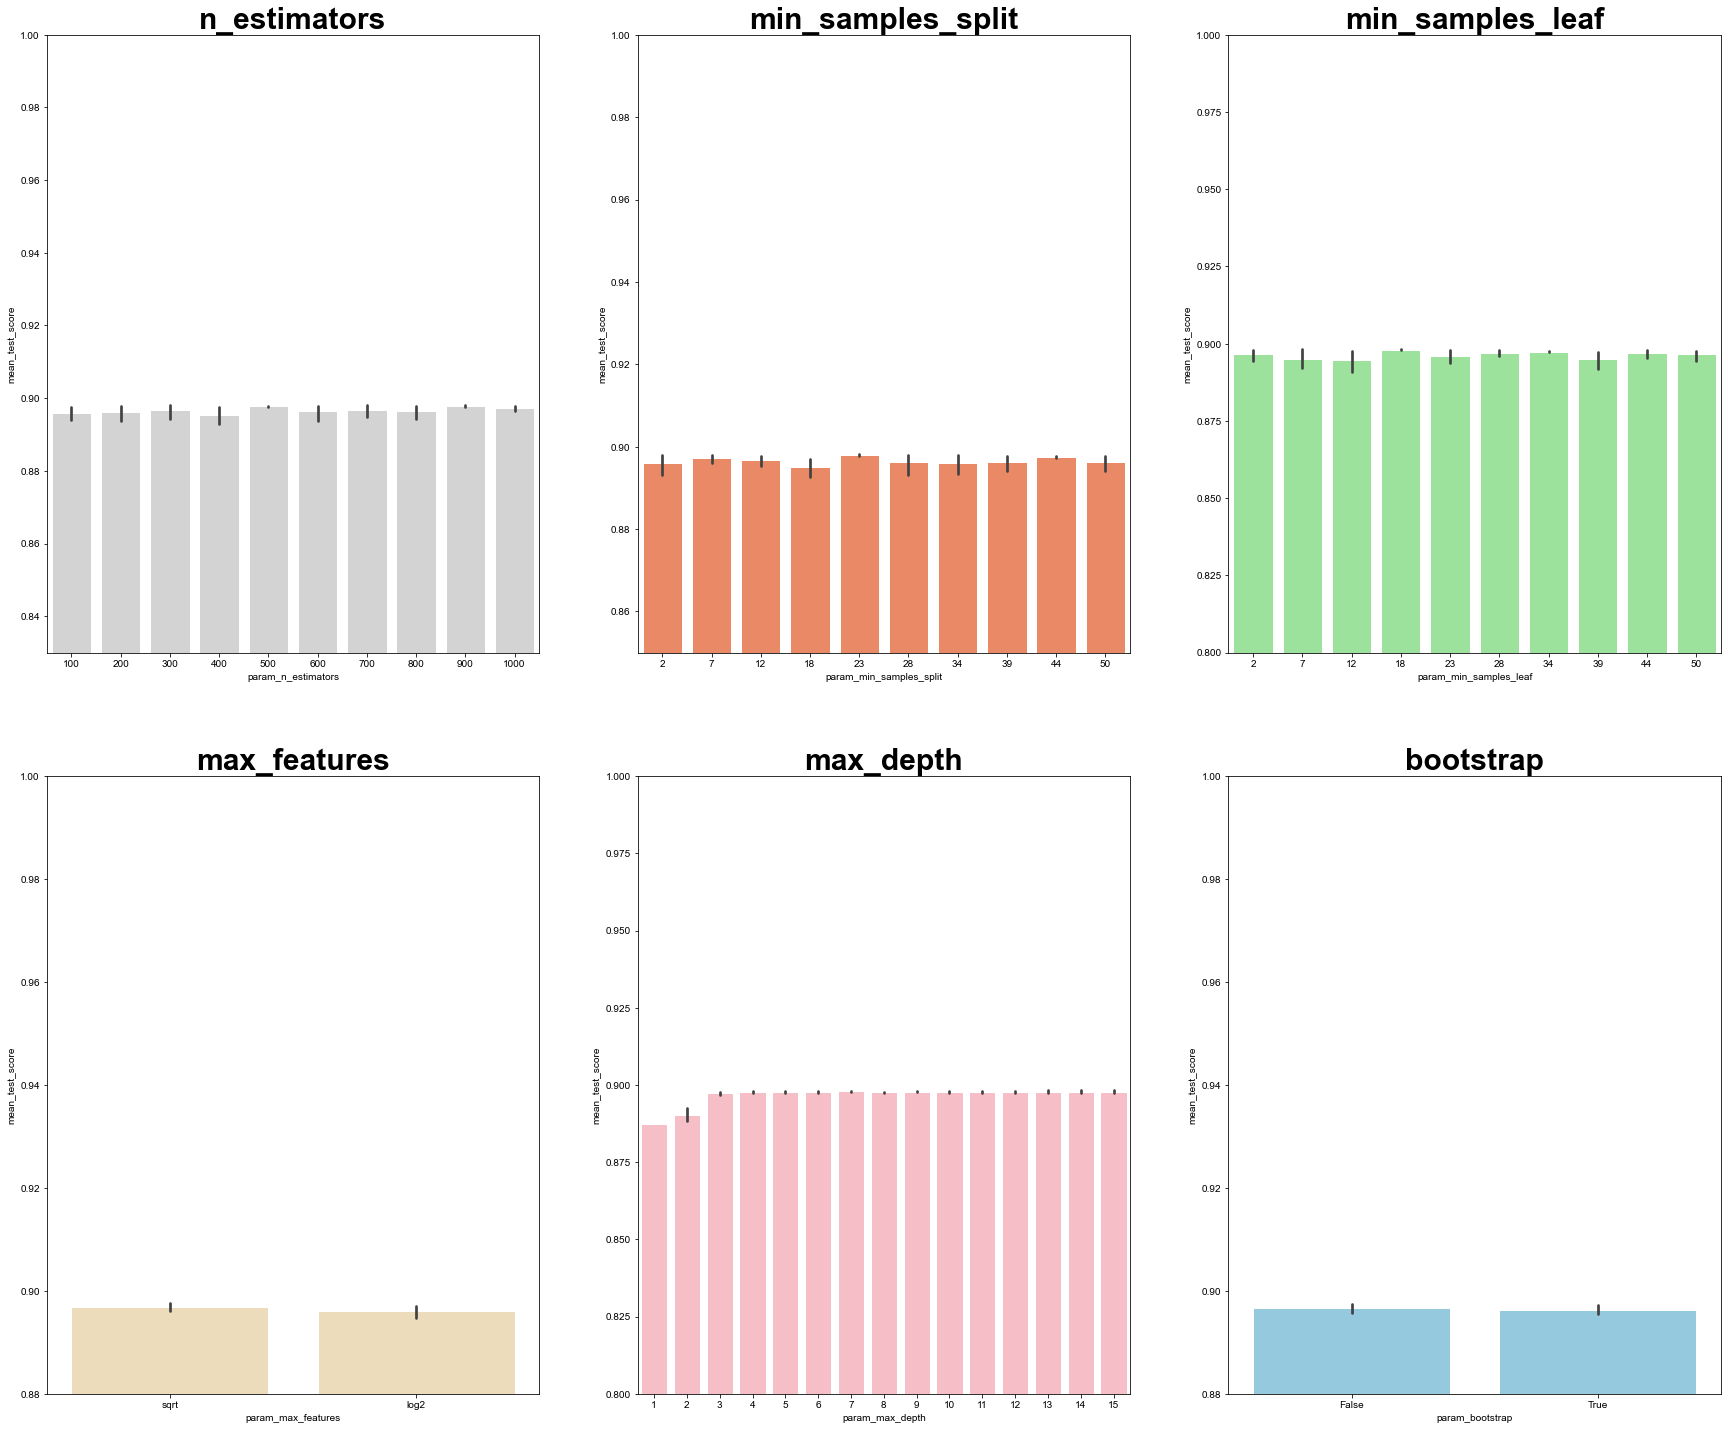

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 1)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.83,1])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.85,1])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.80,1])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.88,1])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.80,1])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.88,1])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

Исходя из построенных графиков, можно сделать вывод, что средние значения гиперпараметров находятся приблизительно на одном уровне, соответственно, достаточно трудно выбрать наилучшие значения. Продолжение улучшения модели не принесет существенных результатов.

In [24]:
s = pickle.dumps(rs)
rs_saved = pickle.loads(s)

#### Stacking

In [27]:
estimators = [('knn', knn.best_estimator_), 
              ('lr', lr.best_estimator_), 
              ('rs', rs.best_estimator_)
]

sc_params = {
    'final_estimator': [knn.best_estimator_, 
                        lr.best_estimator_, 
                        rs.best_estimator_],
    'stack_method': ['auto', 'predict_proba', 'decision_function', 'predict'],
    'passthrough': [True, False],
    'verbose': range(1, 100)
}

stack = StackingClassifier(estimators=estimators)

sc = RandomizedSearchCV(
    estimator=stack, 
    param_distributions=sc_params, 
    scoring='roc_auc', 
    cv=5, n_jobs=-1, verbose=True
).fit(X_train, y_train_edited)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.2min finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   18.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elap

In [28]:
s = pickle.dumps(sc)
sc_saved = pickle.loads(s)

print(sc.best_score_)
print(sc.best_estimator_)

0.7927410072926847
StackingClassifier(estimators=[('knn',
                                KNeighborsClassifier(algorithm='kd_tree',
                                                     leaf_size=36,
                                                     metric='manhattan',
                                                     n_neighbors=13)),
                               ('lr',
                                LogisticRegression(C=130.65335326633166,
                                                   class_weight='balanced',
                                                   tol=0.32132199999999994)),
                               ('rs',
                                RandomForestClassifier(max_depth=14,
                                                       max_features='sqrt',
                                                       min_samples_leaf=12,
                                                       min_samples_split=28,
                                                       n

In [29]:
models = {
          'KNN': knn.best_estimator_,
          'LR': lr.best_estimator_,
          'RS': rs.best_estimator_,
          'SC': sc.best_estimator_
}

In [71]:
knn.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=36, metric='manhattan',
                     n_neighbors=13)

In [72]:
lr.best_estimator_

LogisticRegression(C=130.65335326633166, class_weight='balanced',
                   tol=0.32132199999999994)

In [73]:
rs.best_estimator_

RandomForestClassifier(max_depth=14, max_features='sqrt', min_samples_leaf=12,
                       min_samples_split=28, n_estimators=800)

#### Проверка моделей

Проверим работу на holdout выборке

In [30]:
X_holdout = holdout[[x for x in holdout if x != 'y']]
y_holdout = holdout['y']

X_holdout = vec.transform(X_holdout)

Закодируем y_holdout

In [31]:
holdout_y_encoder = LabelEncoder().fit(y_holdout)

y_holdout_edited = target_encoder.transform(y_holdout)

#### ROC_AUC

In [53]:
print('ROC AUC for X_test')
for model_name, model in models.items():
    print('ROC AUC of {0: <4} for X_test:'.format(model_name), roc_auc_score(y_test_edited, model.predict_proba(X_test)[:,1]))

print('\nROC AUC for holdout')
for model_name, model in models.items():
    print('ROC AUC of {0: <4} for holdout:'.format(model_name), roc_auc_score(y_holdout_edited, model.predict_proba(X_holdout)[:,1]))

ROC AUC for X_test
ROC AUC of KNN  for X_test: 0.7100272114523218
ROC AUC of LR   for X_test: 0.7646690009048092
ROC AUC of RS   for X_test: 0.8012338801374951
ROC AUC of SC   for X_test: 0.7969854195686698

ROC AUC for holdout
ROC AUC of KNN  for holdout: 0.7164146893721401
ROC AUC of LR   for holdout: 0.7670371391339214
ROC AUC of RS   for holdout: 0.7932671499834898
ROC AUC of SC   for holdout: 0.7923716183546393


In [45]:
from sklearn.model_selection import cross_val_score


На обеих выборках лучшими оказались random forest и stacking

In [74]:
roc_aucs = {
    'KNN': {
        'train': [],
        'test': [],
        'holdout': []
    },
    'LR': {
        'train': [],
        'test': [],
        'holdout': []
    },
    'RS': {
        'train': [],
        'test': [],
        'holdout': []
    },
}

params = {
    'n_neighbors': range(1, 15),
    'C': np.linspace(1e-4, 10, 200),
    'max_depth': range(1, 10),
}

knn_best = knn.best_params_.copy()
del knn_best['n_neighbors']

for i in params['n_neighbors']:
    knn_model = KNeighborsClassifier(
        n_neighbors=i, 
        weights=knn.best_params_['weights'], 
        algorithm=knn.best_params_['algorithm'],
        leaf_size=knn.best_params_['leaf_size'],
        metric=knn.best_params_['metric'],
    ).fit(X_train, y_train_edited)
    roc_aucs['KNN']['train'].append(cross_val_score(knn_model, X_train, y_train_edited, scoring='roc_auc').mean())
    knn_model.fit(X_train, y_train_edited)
    roc_aucs['KNN']['test'].append(roc_auc_score(y_test_edited, knn_model.predict_proba(X_test)[:,1]))
    roc_aucs['KNN']['holdout'].append(roc_auc_score(y_holdout_edited, knn_model.predict_proba(X_holdout)[:,1]))


lr_best = lr.best_params_.copy()
del lr_best['C']

for i in params['C']:
    lr_model = LogisticRegression(
        C=i,
        class_weight=lr.best_params_['class_weight'],
        tol=lr.best_params_['tol'],
        penalty=lr.best_params_['penalty'],
        solver=lr.best_params_['solver'],
    ).fit(X_train, y_train_edited)
    roc_aucs['LR']['train'].append(cross_val_score(lr_model, X_train, y_train_edited, scoring='roc_auc').mean())
    lr_model.fit(X_train, y_train_edited)
    roc_aucs['LR']['test'].append(roc_auc_score(y_test_edited, lr_model.predict_proba(X_test)[:,1]))
    roc_aucs['LR']['holdout'].append(roc_auc_score(y_holdout_edited, lr_model.predict_proba(X_holdout)[:,1]))


rs_best = rs.best_params_.copy()
del rs_best['max_depth']

for i in params['max_depth']:
    rs_model = RandomForestClassifier(
        max_depth=i,
        max_features=rs.best_params_['max_features'],
        min_samples_split=rs.best_params_['min_samples_split'],
        n_estimators=rs.best_params_['n_estimators']
    ).fit(X_train, y_train_edited)
    roc_aucs['RS']['train'].append(cross_val_score(rs_model, X_train, y_train_edited, scoring='roc_auc').mean())
    rs_model.fit(X_train, y_train_edited)
    roc_aucs['RS']['test'].append(roc_auc_score(y_test_edited, rs_model.predict_proba(X_test)[:,1]))
    roc_aucs['RS']['holdout'].append(roc_auc_score(y_holdout_edited, rs_model.predict_proba(X_holdout)[:,1]))

In [75]:
cross_val_score(rs_model, X_train, y_train_edited, scoring='roc_auc', cv=5).mean()

0.7936688578990589

In [61]:
roc_auc_score(y_train_edited, rs_model.predict_proba(X_train)[:,1])

0.815088203349365

In [67]:
cross_val_score(rs_model, X_test, y_test_edited, scoring='roc_auc', cv=5).mean()

0.7971100086953389

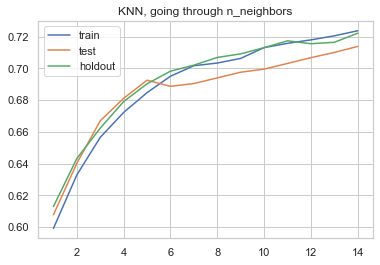

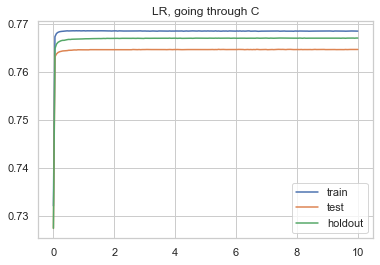

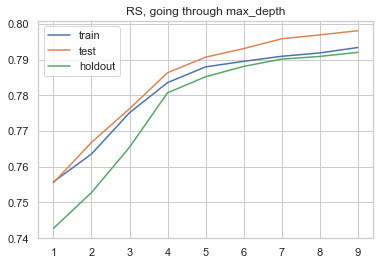

In [76]:
for (model_name, rocs), (param_name, param) in zip(roc_aucs.items(), params.items()):
    plt.title(f'{model_name}, going through {param_name}')
    plt.plot(param, rocs['train'])
    plt.plot(param, rocs['test'])
    plt.plot(param, rocs['holdout'])
    plt.legend(['train', 'test', 'holdout'])
    plt.show()
    print()

На всех моделях train кривая выше остальных. Это может означать переобучение. В случае линейной регрессии качество модели не меняется с увеличением гиперпараметра. В случае random forest увеличение глубины деревьев для всех выборок улучшает предсказание. В случае KNN кривая train ведет себя обратно относительно других кривых. Кривые test и holdout очень близки

###  Часть 3. Выбор наилучшей модели

In [77]:
from sklearn.metrics import accuracy_score
from time import time

In [78]:
models_results = pd.DataFrame(columns=['test_acc', 'test_roc', 'holdout_acc', 'holdout_roc', 'test_time', 'holdout_time'])

for model_name, model in models.items():
    test_time = time()
    y_test_pred = model.predict(X_test)
    test_time = time() - test_time

    holdout_time = time()
    y_holdout_pred = model.predict(X_holdout)
    holdout_time = time() - holdout_time

    test_acc = accuracy_score(y_test_edited, y_test_pred)
    test_roc = roc_auc_score(y_test_edited, y_test_pred)

    holdout_acc = accuracy_score(y_holdout_edited, y_holdout_pred)
    holdout_roc = roc_auc_score(y_holdout_edited, y_holdout_pred)

    models_results.loc[model_name, 'test_acc'] = test_acc
    models_results.loc[model_name, 'test_roc'] = test_roc
    models_results.loc[model_name, 'holdout_acc'] = holdout_acc
    models_results.loc[model_name, 'holdout_roc'] = holdout_roc
    models_results.loc[model_name, 'test_time'] = test_time
    models_results.loc[model_name, 'holdout_time'] = holdout_time

In [79]:
models_results

,test_acc,test_roc,holdout_acc,holdout_roc,test_time,holdout_time
KNN,0.895549,0.583997,0.898762,0.5911,12.2374,13.2714
LR,0.813733,0.717693,0.816096,0.713392,0.0301719,0.00199699
RS,0.89909,0.595301,0.902403,0.601619,1.49783,1.146
SC,0.852301,0.747754,0.858461,0.747141,12.9333,13.2662


### Заключение

По результатам сравнения наилучшей моделью оказалась логистическая регрессия - она была значительно быстрее остальных моделей. При измерении roc_auc логистическая регрессия значительно превосходит остальные модели. При измерении accuracy лучше остальных себя показали random forest и stacking - их значения находятся в районе 0.9. 